# Predicting Fradulent Transactions of Financial Company

# ---------------------------------------------------------------------------------------------------------------
### The aim of this project to develop a machine learning model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan. 
# ---------------------------------------------------------------------------------------------------------------

### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline

### Data Pre-processing:

In [2]:
#reading the csv file

df = pd.read_csv(r"C:\Users\yashk\OneDrive\Documents\Fraud Detection\Fraud.csv")

In [3]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
#Checking if dataset has any null values

df.isnull().values.any()

False

There are no null values in the dataframe

### Checking if the given data is unbalanced or not

We need to handle unbalanced data, as it can lead to a bias in the trained model, which can negatively impact its performance.

In [6]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])

legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit Transactions: ", legit)
print("Number of Fraud Transactions: ", fraud)

print("Percentage of Legit Transactions: {:.4f}%".format(legit_percent))
print("Percentage of Fraud Transactions: {:.4f}%".format(fraud_percent))

Number of Legit Transactions:  6354407
Number of Fraud Transactions:  8213
Percentage of Legit Transactions: 99.8709%
Percentage of Fraud Transactions: 0.1291%


The percentage of Legit data is 99.8709% and that of Fraud data is 0.1291%.

This clearly states that, the given data is highly unbalanced.

### The best way to handle unbalanced data is by using Decision Tress algorithm and Random Forest algorithm.

# ---------------------------------------------------------------------------------------------------------------

### Creating a copy of original dataset to train and test models

In [7]:
new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Label Encoding for converting categorical data into numerical data

In [8]:
# Checking how many attributes are dtype: object

objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


There are 3 attributes with Object Datatype. Thus we need to label encode them in order to check MULTICOLINEARITY.

In [9]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


In [10]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


### MULTICOLINEARITY

In [11]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


The variable with highest VIF are oldbalanceOrg and newbalanceOrg, thus we can state that they are highly correlated.
the variable oldbalanceDest and newbalanceDest also have high VIF, and are correlated.
The variable nameDest is correlated to variable nameOrig.

Therefore, we will combine these pairs of collinear attributes and drop the individual ones.

In [12]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


To select variables that will be included in the model, we will use the VIF values and correlation heatmap.

Objectives:

    1. Check if there are any highly correlated variables.
    
    2. Drop the variable(s) that are less correlated to isFraud variable.

<Axes: >

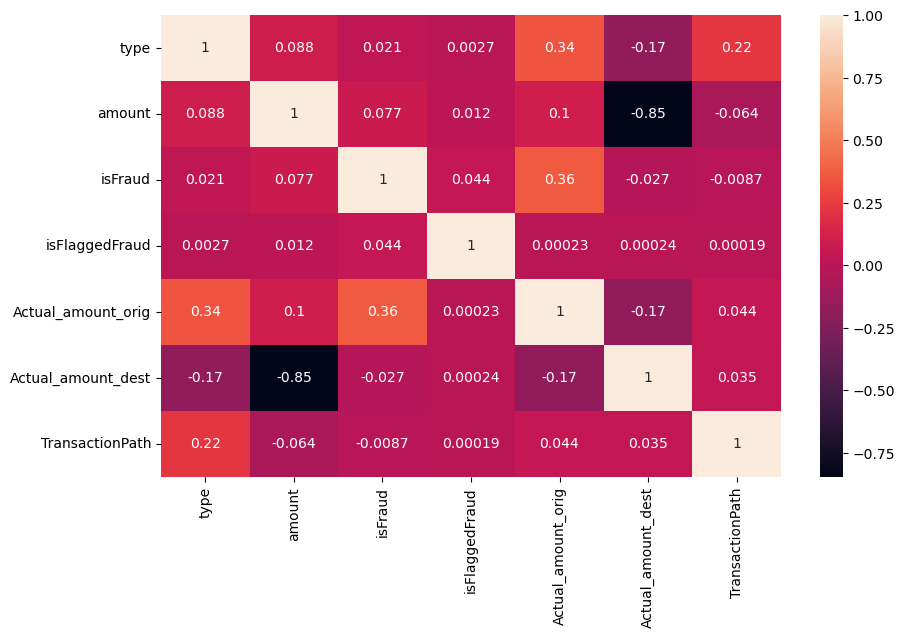

In [13]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

### MODEL BUILDING

In [14]:
#Importing Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Performing Scaling on data to ensure that gradient descent converges more smoothly and quickly.

In [15]:
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

### Splitting the dataset into test dataset and training dataset

In [16]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


### MODEL TRAINING

Training the Decision Tree model and Random Forest model simultaneously, as it will help us compare the results easily.

In [17]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [18]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

### EVALUATION

In [19]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)

print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.92293531071581
Random Forest Score:  99.95903155199169


### Using Confusion Matrix to represent the prediction summary in matrix form.

Key terms of Confusion matrix are True Positive(TP), False Positive(FP), True Negative() and False Negative().

In [20]:
# key terms of Confusion Matrix for Decision Tree

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix for Random Forest

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 1715
False Positives: 751
True Negatives: 1905600
False Negatives: 720
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 1715
False Positives: 62
True Negatives: 1906289
False Negatives: 720


In [21]:
# confusion matrix for Decision Tree

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix for Random Forest

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[1905600     751]
 [    720    1715]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[1906289      62]
 [    720    1715]]


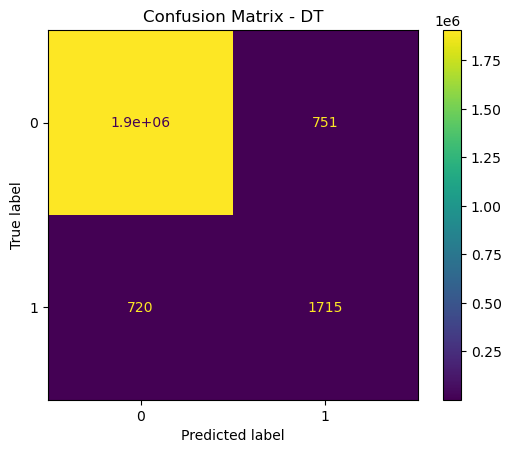

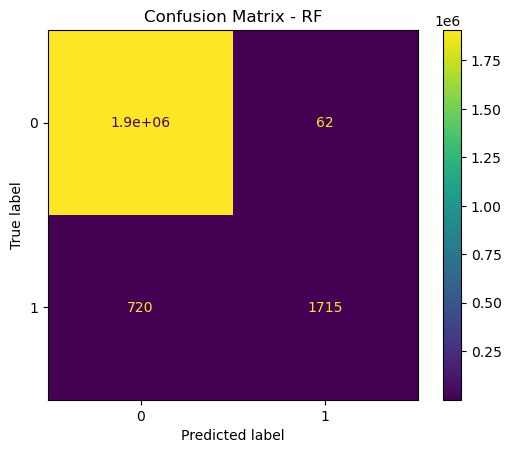

In [32]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

By reviewing the output generated using Confusion Matrix, we can state that: 

TP(Decision Tree) ~ TP(Random Forest)

FP(Decision Tree) > FP(Random Forest)

TN(Decision Tree) < TN(Random Forest)

FP(Decision Tree) ~ FN(Random Forest)

### Classification Report of Decision Tree and Random Forest

Classification Report gives a detailed breakdown of how well your model performs on each class, and how it balances the trade-off between precision and recall.

In [22]:
# classification report for Decision Tree

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report for Random Forest

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.70      0.70      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.97      0.70      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



While evaluating the results of both Decision Tree model and Random Forest model, we can see that, Random Forest performs better in terms of Precision as well as F1_score.

### Using AUC ROC to visualize how well the classifier model works

AUC ROC of Decision Tree:  0.8519590843246581


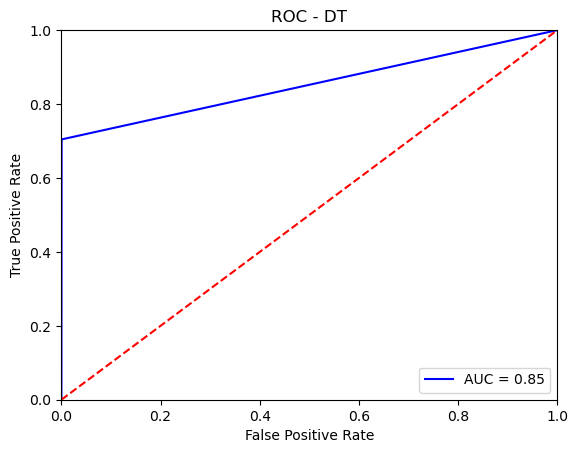

In [38]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc_dt = metrics.auc(fpr, tpr)
print('AUC ROC of Decision Tree: ',roc_auc_dt)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AUC ROC of Random Forest:  0.8521397960613739


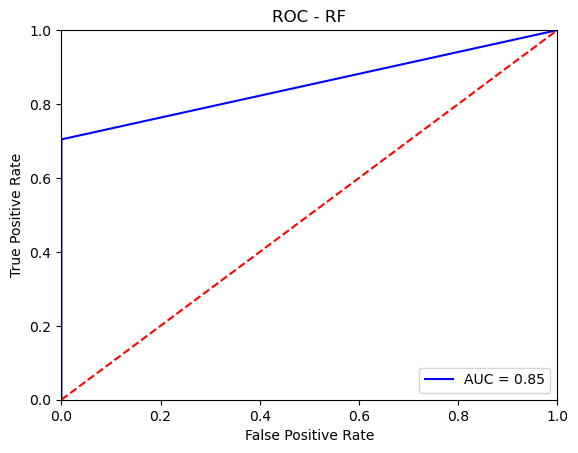

In [39]:
# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc_rf = metrics.auc(fpr, tpr)

print("AUC ROC of Random Forest: ",roc_auc_rf)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

From the AUC ROC curve, the AUC(Decision Tree) is 0.8519 and AUC(Random Forest) is 0.8521.

As the ROC AUC score of both the models are above 0.8, we can considered both of the models to be working pretty good.

### After evaluating every factor, we can say that Random Forest model has an edge over Decision Tree model as it's precison and f1_score are better than Decision tree model.

Let's print the predicted values we got using Random Forest into a csv file.

As the Random forest model was slightly accurate than the Decision Tree model, we will print the predicted values of the Random Forest model. 

In [42]:
fraud_prediction = pd.DataFrame(Y_pred_rf, columns=['isFraud']).to_csv('fraud_prediction.csv')

# ---------------------------------------------------------------------------------------------------------------

## Data Visualization

As we are done with building a machine learning model to predict the fraud transactions in the Financial Company, now let's use Data Visualization tchniques to see if we can find any insights from the give data.

In [43]:
#Checking attributes in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<Axes: >

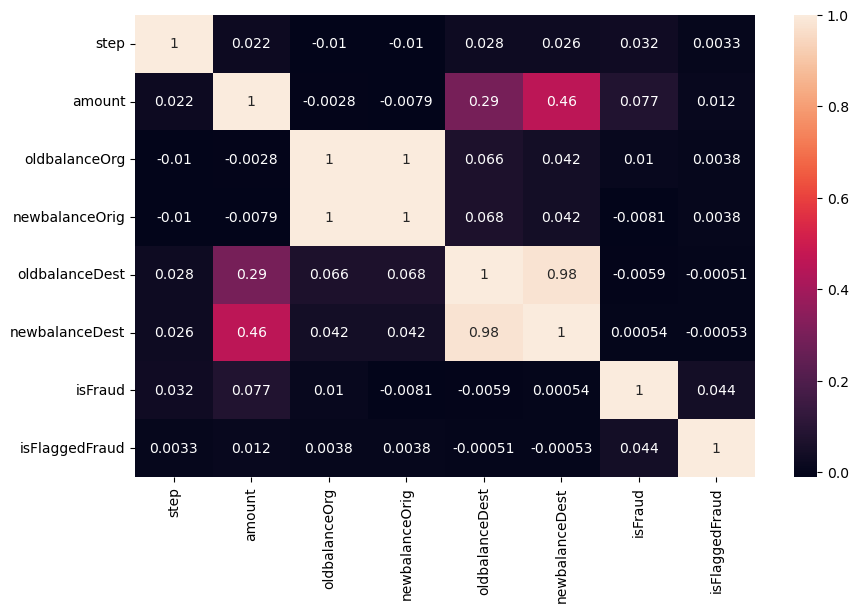

In [44]:
#Using Heat Map to check which attributes are correlated to each other.

corr=df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

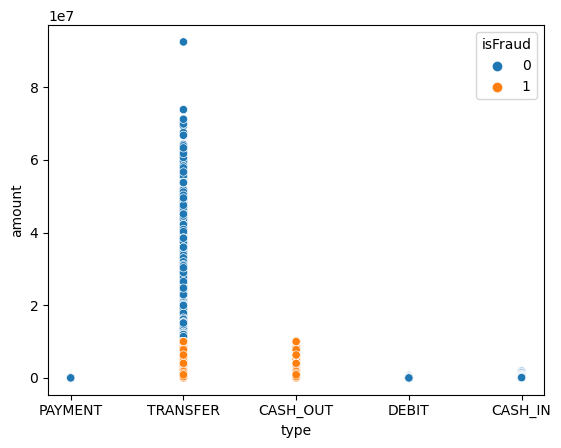

In [48]:
#Lets see if 'amount' and 'type' attributes has any relation with 'isFraud' attribute

#Using Scatterplot 

import seaborn as sns

sns.scatterplot(x=df['type'],y=df['amount'],hue=['isFraud'])
plt.show()

After analyzing the Scatter Plot, we can state that: 

    1. Most of the fraud transactions are done from Transfer and Cash_out.

    2. Fraud Transactions are done mostly on low amounts.

# ---------------------------------------------------------------------------------------------------------------

###                                      DETAILED REPORT OF THE PROJECT:

The Machine Learning model aims to predict fraudulent transactions in a financial company.

In a Fraud detection model, the PRECISION of the model is highly important. Other factors like accuracy, f1_score, and auc_roc score are also important. Instead of predicting Legitimate transactions, our focus is to predict Fraud transactions, thus we have to be precise with our predictions.

MULTICOLINEARITY:  
The dataset provided has attributes that are highly correlated to each other, we can see that by the Variance Inflation Factor. The highly correlated attributes are combined into one attribute and the individual attributes are dropped.

SELECTION OF THE MODEL:  
Checking if the data is unbalanced, is a very important part of model-building as unbalanced data can give biased predictions. The dataset provided is highly unbalanced as the percentage of Legit data is 99.8709% and that of Fraud data is 0.1291%.
To resolve this unbalanced data we will use Random Forest Classifier and Decision Tree Classifier.
Models like XGBoost, Bagging, ANN, and Logistic Regression may give good accuracy but they won't give good precision and recall values.

SPLITTING THE DATASET INTO TEST AND TRAIN:  
Before building and evaluating the model, we will split the data into the Training dataset and the Test dataset. But before that, we will create a copy of the dataset given and then split it into train and test. I have kept the test_size = 0.3, meaning 30% of the data will be used for the test set and the remaining 70% for the training set.

Decision Tree: Decision trees in machine learning provide an effective method for making decisions because they lay out the problem and all the possible outcomes

Random Forest: Random Forest reduces overfitting by averaging multiple decision trees and is less sensitive to noise and outliers in the data.

EVALUATION SCORE OF THE MODELS:  
After we build the model, we evaluate them by removing the score.  
The score of the Decision Tree Classifier: 99.92293531071581  
The score of Random Forest Classifier: 99.95903155199169  
The scores of both models are almost similar.  

CONFUSION MATRIX:  
To further evaluate the models we will use Confusion Matrix to represent the prediction summary in matrix form. The key terms of the Confusion Matrix are True Positive (TP), False Positive (FP), True Negative (TN), and False Negative (FN). While comparing these key terms, we found that the True Negatives of the Random Forest are less than the True Negatives of the Decision Tree. Other key terms were almost similar. So this tells us that Random Forest is better than Decision Tree.

CLASSIFICATION REPORT:  
Another evaluation technique used was the Classification Report. The Classification Report gives a detailed breakdown of how well your model performs on each class, and how it balances the trade-off between precision and recall. It returns us with the values of f1_score, precision, recall, and support. When we compare the values of the Random Forest and Decision Tree, we can see that the precision of the Random forest for predicting fraudulent transactions is 0.97 and the f1_score for predicting fraudulent transactions is 0.81. Whereas, that of the Decision Tree is 0.70 in terms of both precision and f1_score. Thus, we can conclude that a Random Forest is better than a Decision Tree.

ROC_AUC SCORE:  
Another way of evaluating the models is by ROC AUC score and curve. The AUC is widely used to measure the accuracy of diagnostic tests. The closer the ROC curve is to the upper left corner of the graph, the higher the accuracy of the test because in the upper left corner, the sensitivity = 1 and the false positive rate = 0 (specificity = 1). The ideal ROC curve thus has an AUC = 1.0. The AUC(Decision Tree) is 0.8519 and AUC(Random Forest) is 0.8521. As the ROC AUC score of both the models is above 0.8, we can consider both of the models to be working pretty well.

CONCLUSION:  
To conclude, we can see both the models are efficient and are providing good results. However, the Random Forest model has slightly better results than the Decision Tree model. So we will print the predicted values of the Random Forest classifer model into a CSV format.

### DATA VISUALIZATION:

<> I took three variables into consideration, that were isFraud, type, and amount from the given dataset. Then used data visualization to check if they can provide any insights from the data. Using scatterplot, I kept the x-variable as 'type', y-variable as 'amount' and hue as 'isFraud'. 

<> By evaluating the scatterplot we can see that most number of transactions are using Transfer and Cash-out. Out of which Transfer has the highest number of transactions. We can also see that the most number of fraud transactions are also from Transfer and Cash-out.   

<> The other thing we can see from the scatterplot is that the most number of Fraud transactions are done when the amount is LOW.

### PREVENTIVE MEASURES THAT CAN BE TAKEN BY THE COMPANY:

1. Assign a unique id to merchants and customers to track their every transaction. This will also help the company to check if the same customers or merchants are doing fraud transactions are not.  
2. By Data Visualization technique, we came to know that most fraud transactions happen when the amount is low, so the company can keep less transaction types for lower amount of transactions, to help them evaluate the data.  
3. Ask for bank statements of the transactions done to keep records and evaluate them.
4. Using VPN for reducing fraud online transactions and keep the system safe. 

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------